# Image prediction - cat or dog?

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf

## Dataset

This dataset contains about 5000 pictures of cats and dogs (4000 for training and 1000 for testing). Each category will be in a separated folder, cat-and-dog/training_set/ and cat-and-dog/test_set and then in sub folders `cats` and `dogs`.

In [2]:
!curl "https://wagon-public-datasets.s3.amazonaws.com/deep_learning_datasets/cat-and-dog.zip" --output cat-and-dog.zip
!unzip -qn cat-and-dog.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  109M  100  109M    0     0  27.2M      0  0:00:04  0:00:04 --:--:-- 27.2M


In [3]:
!ls

cat-and-dog-small  cat-and-dog.zip  sample_data


In [4]:
!ls cat-and-dog-small

test_set  training_set


In [5]:
!ls cat-and-dog-small/training_set/

cats  dogs


Stored the location of the data in 2 variables that may be reused later.



In [6]:
train_data_dir = "cat-and-dog-small/training_set/"
test_data_dir = "cat-and-dog-small/test_set/"

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img = load_img(f"{train_data_dir}cats/cat.3.jpg")
x = img_to_array(img)/255  # Divided the pixel value by 255 to end up between 0 and 1

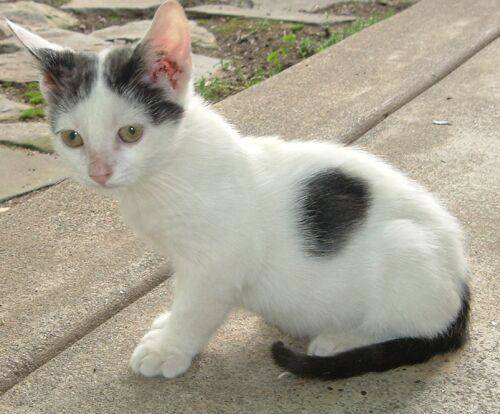

In [10]:
img

In [21]:
x.shape

(414, 500, 3)

### First iteration of the model (baseline)

In [8]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, callbacks

In [9]:
from tensorflow.keras.utils import image_dataset_from_directory

In [10]:
model = Sequential()

model.add(layers.Input((150, 150, 3)))
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same"))
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same"))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding="same"))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation="relu"))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 150, 150, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 150, 150, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 150, 150, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2880000)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │     184,320,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 184,422,625 (703.52 MB)

 Trainable params: 184,422,625 (703.52 MB)

 Non-trainable params: 0 (0.00 B)

Since I didn't use any pooling layers, there was a large amount of parameters

### Second iteration of the model

This time WITH pooling layers

In [11]:
model = Sequential()

model.add(layers.Input((150, 150, 3)))
model.add(layers.Rescaling(1./255))

model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )


model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )


model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )

model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )

model.add(layers.Flatten())

# Flatten data to end up with just one dimension

model.add(layers.Dense(64, activation="relu"))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation="sigmoid"))

#  Perform the prediction using sigmoid

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 75, 75, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 38, 38, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 38, 38, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 19, 19, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 19, 19, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         819,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 921,825 (3.52 MB)

 Trainable params: 921,825 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

Pooling layers have drastically reduced the amount of parameters.

In [14]:
adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

Created a Tensorflow Datasets object to:


*   Grab images from the directory batch by batch
*   Reshape all the images to the desired input shape: 150x150



In [15]:
batch_size = 64

In [16]:
train_ds = image_dataset_from_directory(
    train_data_dir, #Where data is located
    labels="inferred",  #Labels are inferred based on folder structure
    label_mode="binary", #Labels will be cat = 0 and dog = 1
    seed=123, #Ensures the process is reproducible and not random
    image_size=(150, 150), #The target size to resize images so they fit the model
    batch_size=batch_size)

# Defined a second Dataset for the val data

val_ds = image_dataset_from_directory(
    test_data_dir,
    labels="inferred",
    label_mode="binary",
    seed=123,
    image_size=(150, 150),
    batch_size=batch_size)

Found 4004 files belonging to 2 classes.
Found 1012 files belonging to 2 classes.


In [17]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


Created callbacks to be called at the end of every epoch:


*   ModelCheckpoint to save the best version of the model after every epoch
*   ReduceLROnPlateau to reduce the `learning_rate` if the model doesn't get better after a few epochs
*   EarlyStopping to stop the training after a certain time if it's not improving



In [18]:
MODEL = "model_1.keras"

modelCheckpoint = callbacks.ModelCheckpoint(MODEL,
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss",
                                        factor=0.1,
                                        patience=3,
                                        verbose=1,
                                        min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss',
                                       patience=10,
                                       verbose=0,
                                       restore_best_weights=True)

In [19]:
%%time
history = model.fit(
        train_ds,
        epochs=30,
        validation_data=val_ds,
        callbacks=[modelCheckpoint, LRreducer, EarlyStopper]
        )

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - accuracy: 0.5087 - loss: 0.6959 - val_accuracy: 0.5919 - val_loss: 0.6643 - learning_rate: 0.0010
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 199s 3s/step - accuracy: 0.5976 - loss: 0.6644 - val_accuracy: 0.6522 - val_loss: 0.6391 - learning_rate: 0.0010
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.6469 - loss: 0.6350 - val_accuracy: 0.6897 - val_loss: 0.5925 - learning_rate: 0.0010
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.6802 - loss: 0.5952 - val_accuracy: 0.6927 - val_loss: 0.5876 - learning_rate: 0.0010
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.6995 - loss: 0.5741 - val_accuracy: 0.7164 - val_loss: 0.5734 - learning_rate: 0.0010
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.7251 - loss: 0.5500 - val_accuracy: 0.7500 - val_loss: 0.5276 - learning_rate: 0.0010
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.7504 - loss: 0.5107 - val_acc

In [20]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [21]:
def plot_compare_history(history, name_history, history_1, name_history_1):

    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    ax[0].set_title('loss')

    ax[0].plot(history.epoch, history.history["loss"], label="Train loss " + name_history)
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss " + name_history)

    ax[0].plot(history_1.epoch, history_1.history["loss"], label="Train loss " + name_history_1)
    ax[0].plot(history_1.epoch, history_1.history["val_loss"], label="Validation loss " + name_history_1)

    ax[1].set_title('Accuracy')

    ax[1].plot(history.epoch, history.history["accuracy"], label="Train Accuracy " + name_history)
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation Accuracy " + name_history)

    ax[1].plot(history_1.epoch, history_1.history["accuracy"], label="Train Accuracy " + name_history_1)
    ax[1].plot(history_1.epoch, history_1.history["val_accuracy"], label="Validation Accuracy " + name_history_1)

    ax[0].legend()
    ax[1].legend()

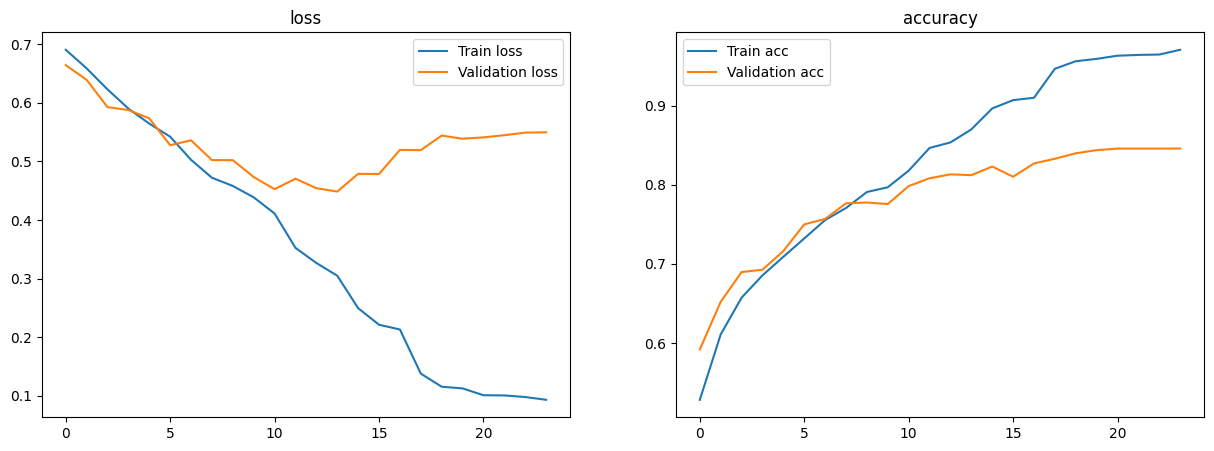

In [22]:
plot_history(history)

## Data Augmentation

### Third model with Data Augmentation

In [23]:
# Used a model with the same convolutional layers, but adding augmentation layers before that

model_2 = Sequential()

model_2.add(layers.Input((150, 150, 3)))
model_2.add(layers.Rescaling(1./255))

# Data augmentation layers

model_2.add(layers.RandomFlip("horizontal"))
model_2.add(layers.RandomZoom(0.1))
model_2.add(layers.RandomTranslation(0.2, 0.2))
model_2.add(layers.RandomRotation(0.1))


# Convolutional layers

model_2.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same"))
model_2.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )


model_2.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same"))
model_2.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )


model_2.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
model_2.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )

model_2.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding="same"))
model_2.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )

model_2.add(layers.Flatten())

model_2.add(layers.Dense(64, activation="relu"))

model_2.add(layers.Dropout(0.5))

model_2.add(layers.Dense(1, activation="sigmoid"))

In [24]:
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip (RandomFlip)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom (RandomZoom)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_translation                   │ (None, 150, 150, 3)         │               0 │
│ (RandomTranslation)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation (RandomRotation)     │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 75, 75, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 38, 38, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 38, 38, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 19, 19, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 19, 19, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         819,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 921,825 (3.52 MB)

 Trainable params: 921,825 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
adam = optimizers.Adam(learning_rate=0.001)

model_2.compile(loss='binary_crossentropy',
                optimizer=adam,
                metrics=['accuracy'])

In [26]:
MODEL = "model_2.keras"

modelCheckpoint = callbacks.ModelCheckpoint(MODEL,
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss",
                                        factor=0.1,
                                        patience=3,
                                        verbose=1,
                                        min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss',
                                       patience=10,
                                       verbose=0,
                                       restore_best_weights=True)

In [27]:
%%time
history_2 = model_2.fit(
        train_ds,
        epochs=5,
        validation_data=val_ds,
        callbacks = [modelCheckpoint, LRreducer, EarlyStopper]
        )

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 178s 3s/step - accuracy: 0.5034 - loss: 0.6960 - val_accuracy: 0.6206 - val_loss: 0.6929 - learning_rate: 0.0010
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 212s 3s/step - accuracy: 0.5159 - loss: 0.6926 - val_accuracy: 0.6067 - val_loss: 0.6732 - learning_rate: 0.0010
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 177s 3s/step - accuracy: 0.5700 - loss: 0.6884 - val_accuracy: 0.6522 - val_loss: 0.6450 - learning_rate: 0.0010
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.6171 - loss: 0.6569 - val_accuracy: 0.6848 - val_loss: 0.6051 - learning_rate: 0.0010
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.6393 - loss: 0.6398 - val_accuracy: 0.6907 - val_loss: 0.6022 - learning_rate: 0.0010
CPU times: user 21min 47s, sys: 2min 56s, total: 24min 44s
Wall time: 16min 9s


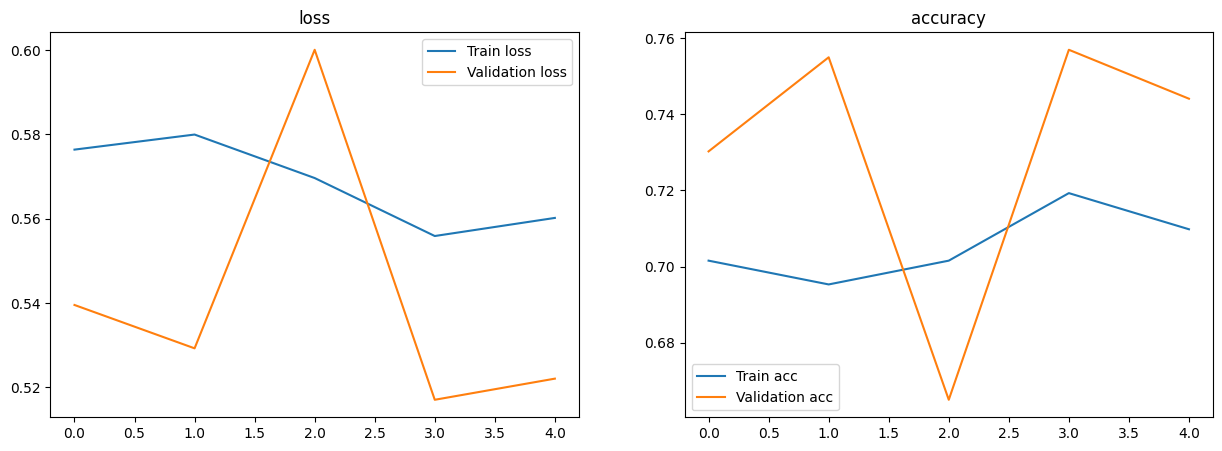

In [ ]:
plot_history(history_2)

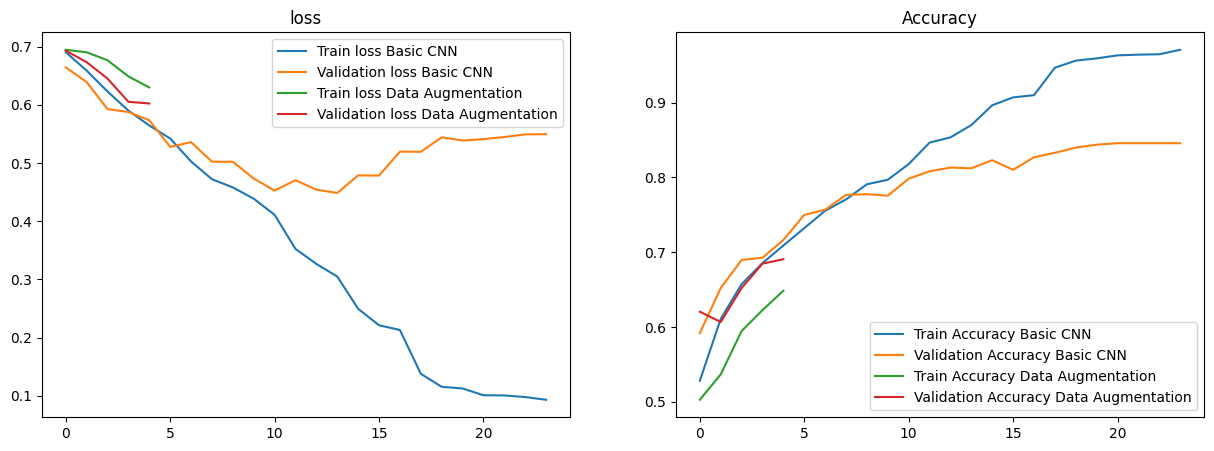

In [28]:
plot_compare_history(history, "Basic CNN", history_2, "Data Augmentation")

## Transfer Learning

### Third model with Transfer Learning and Data Augmentation

In [29]:
data_augmentation = Sequential()

data_augmentation.add(layers.RandomFlip("horizontal"))
data_augmentation.add(layers.RandomZoom(0.1))
data_augmentation.add(layers.RandomTranslation(0.2, 0.2))
data_augmentation.add(layers.RandomRotation(0.1))

In [30]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

In [31]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [32]:
# Initialised the VGG16 model without the top
inputs = layers.Input(shape=(150, 150, 3))

x = data_augmentation(inputs) # Dta augmentation layers
x = preprocess_input(x) # A preprocessing layer specifically designed for the VGG16
x = base_model(x) # Transfer learning model

x = layers.Flatten()(x) # Custom dense layers, tailored to the binary task

x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.3)(x)
pred = layers.Dense(1, activation="sigmoid")(x)

# Keras Functional API to create the keras model

model_3 = Model(inputs=inputs , outputs=pred)

# Freeze the VGG16 model

base_model.trainable = False

# for layer in base_model.layers[:10]:
#     layer.trainable = False

In [33]:
model_3.summary()

Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_3 (Sequential) │ (None, 150, 150, 3)    │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 150, 150)       │              0 │ sequential_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 150, 150)       │              0 │ sequential_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 150, 150)       │              0 │ sequential_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (None, 150, 150, 3)    │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 150, 150, 3)    │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 4, 4, 512)      │     14,714,688 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 8192)           │              0 │ vgg16[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 128)            │      1,048,704 │ flatten_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 128)            │              0 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 64)             │          8,256 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 64)             │              0 │ dense_7[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 1)              │             65 │ dropout_4[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 15,771,713 (60.16 MB)

 Trainable params: 1,057,025 (4.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
adam = optimizers.Adam(learning_rate=0.001)
model_3.compile(loss='binary_crossentropy',
                optimizer=adam,
                metrics=['accuracy'])


In [1]:
MODEL = "model_3.keras"

modelCheckpoint = callbacks.ModelCheckpoint(MODEL,
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss",
                                        factor=0.1,
                                        patience=10,
                                        verbose=1,
                                        min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss',
                                       patience=2,
                                       verbose=0,
                                       restore_best_weights=True)

NameError: name 'callbacks' is not defined

In [ ]:
%%time
history_3 = model_3.fit(
        train_ds,
        epochs=30,
        validation_data=val_ds,
        callbacks = [modelCheckpoint, LRreducer, EarlyStopper])

Epoch 1/30
 5/63 ━━━━━━━━━━━━━━━━━━━━ 17:03 18s/step - accuracy: 0.9082 - loss: 0.2581

In [ ]:
plot_history(history_3)

In [ ]:
plot_compare_history(history, "Basic CNN", history_3, "Transfer Learning")

In [ ]:
plot_compare_history(history_2, "Augmentation", history_3, "Augmentation + Transfer Learning")

## Save and use the model

In [ ]:
model_3.save("model_3")

In [ ]:
from tensorflow.keras.models import load_model

model_3 = load_model("model_3")

In [ ]:
from PIL import Image
import requests
from io import BytesIO

def getImage(url):
    '''Grabs an image based on its URL, and resizes it
    '''
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    img = img.resize((150, 150))
    return img

def predictImage(url, model):
    '''Takes an image and a model
    '''
    img = getImage(url)
    img = img_to_array(img)
    img = img.reshape((-1, 150, 150, 3))
    res = model.predict(img)[0][0]
    if(res < 0.5):
        animal = "cat"
        prob = 1-res
    if(res >= 0.5):
        animal = "dog"
        prob = res

    print("Animal : ", animal)
    print("probability = ",prob)

In [ ]:
cat = "https://www.wikichat.fr/wp-content/uploads/sites/2/comment-soigner-une-plaie-dun-chat.jpg"
cat2 = "http://create.votreveterinaire.com/adm/webmaster/_empty/upload/chat_surpris.jpg"


dog = "https://images.sudouest.fr/2018/04/14/5ace461a66a4bd2b1780a0dd/widescreen/1000x500/on-ignore-si-le-chihuahua-a-deserte-ou-non-les-locaux-de-la-clinique.jpg?v1"
dog2 = "https://ds1.static.rtbf.be/article/image/370x208/7/8/f/a20f02dfccd07952da54a7f9a82b3e89-1524657315.jpg"

In [ ]:
predictImage(cat, model_3)

In [ ]:
predictImage(cat2, model_3)

In [ ]:
predictImage(dog, model_3)

In [ ]:
predictImage(dog2, model_3)